# Pearson Correlation

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

In [19]:
# Import data
data = pd.read_excel('Base Model_2019_ML_Ashiqur.xlsx', sheet_name='Base Model')


In [20]:
data = data[data['Steel_Element'] == 107] 
data = data.reset_index(drop=True) 
env_nbe_nbi_df = data[[
     
       'temp_dp_2m', 'avg_rh_2m', 'temp_a_10m', 'temp_a_2m', 'temp_a_60c',
       'temp_s_2cm', 'ppt_2019', 'hplus_2019', 'SO4_2019', 'Cl_2019',
       'totalN_201', 'NO3_2019', 'NH4_2019', 'Na_2019', 'K_2019', 'Mg_2019',
       'Ca_2019', 'MAINTENANCE_021', 'Bridge_Age', 'ADT_029',
       'DEGREES_SKEW_034', 'SERVICE_ON_042A', 'SERVICE_UND_042B',
       'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_044A',
       'APPR_TYPE_044B', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
       'SUBSTRUCTURE_COND_060', 'OPERATING_RATING_064', 'INVENTORY_RATING_066',
       'STRUCTURAL_EVAL_067', 'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107',
       'SURFACE_TYPE_108A', 'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C',
       'PERCENT_ADT_TRUCK_109','BRIDGE_CONDITION','CS1', 'CS2', 'CS3', 'CS4']]



In [21]:
env_nbe_nbi_df.head()

,temp_dp_2m,avg_rh_2m,temp_a_10m,temp_a_2m,temp_a_60c,temp_s_2cm,ppt_2019,hplus_2019,SO4_2019,Cl_2019,...,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,BRIDGE_CONDITION,CS1,CS2,CS3,CS4
0,19.685900,82.387398,22.962000,23.228500,22.967199,24.785700,144.593002,0.118370,6.12682,7.79553,...,1,0,0,0,5,1,99.725746,0.000000,0.274254,0.000000
1,19.520201,81.922302,22.861601,23.176001,23.084700,25.084900,144.490005,0.117853,6.16344,8.01924,...,1,0,0,0,2,1,77.518803,19.999007,0.000000,2.482190
2,19.512199,81.895698,22.860599,23.174499,23.095200,25.107700,144.483993,0.117803,6.16788,8.04684,...,1,1,0,0,7,2,0.000000,2.193541,0.000000,97.806459
3,19.610500,82.171501,22.911200,23.205400,23.012699,24.918699,144.585007,0.118218,6.14559,7.92248,...,1,0,0,0,2,1,8.095858,4.115655,0.000000,87.788487
4,19.602301,82.149002,22.905600,23.202700,23.018900,24.933300,144.567001,0.118165,6.14710,7.92923,...,1,0,0,0,2,2,100.000000,0.000000,0.000000,0.000000


# Normalized

In [22]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scale_features = [
       'temp_dp_2m', 'avg_rh_2m', 'temp_a_10m', 'temp_a_2m', 'temp_a_60c',
       'temp_s_2cm', 'ppt_2019', 'hplus_2019', 'SO4_2019', 'Cl_2019',
       'totalN_201', 'NO3_2019', 'NH4_2019', 'Na_2019', 'K_2019', 'Mg_2019',
       'Ca_2019', 'MAINTENANCE_021', 'Bridge_Age', 'ADT_029',
       'DEGREES_SKEW_034', 'SERVICE_ON_042A', 'SERVICE_UND_042B',
       'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_044A',
       'APPR_TYPE_044B', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
       'SUBSTRUCTURE_COND_060', 'OPERATING_RATING_064', 'INVENTORY_RATING_066',
       'STRUCTURAL_EVAL_067', 'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107',
       'SURFACE_TYPE_108A', 'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C',
       'PERCENT_ADT_TRUCK_109','BRIDGE_CONDITION','CS1', 'CS2', 'CS3', 'CS4']
env_nbe_nbi_df[scale_features] = ss.fit_transform(env_nbe_nbi_df[scale_features])

In [23]:
X = env_nbe_nbi_df[['CS1','CS2','CS3','CS4',
       'temp_dp_2m', 'avg_rh_2m', 'temp_a_10m', 'temp_a_2m', 'temp_a_60c',
       'temp_s_2cm', 'ppt_2019', 'hplus_2019', 'SO4_2019', 'Cl_2019',
       'totalN_201', 'NO3_2019', 'NH4_2019', 'Na_2019', 'K_2019', 'Mg_2019',
       'Ca_2019', 'MAINTENANCE_021', 'Bridge_Age', 'ADT_029',
       'DEGREES_SKEW_034', 'SERVICE_ON_042A', 'SERVICE_UND_042B',
       'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_044A',
       'APPR_TYPE_044B', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
       'SUBSTRUCTURE_COND_060', 'OPERATING_RATING_064', 'INVENTORY_RATING_066',
       'STRUCTURAL_EVAL_067', 'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107',
       'SURFACE_TYPE_108A', 'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C',
       'PERCENT_ADT_TRUCK_109','BRIDGE_CONDITION']].values
X

array([[9.97257456e+01, 0.00000000e+00, 2.74254371e-01, ...,
        0.00000000e+00, 5.00000000e+00, 1.00000000e+00],
       [7.75188026e+01, 1.99990071e+01, 0.00000000e+00, ...,
        0.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 2.19354124e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.00000000e+00, 2.00000000e+00],
       ...,
       [1.00000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.50000000e+01, 2.00000000e+00],
       [1.00000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.40000000e+01, 2.00000000e+00],
       [9.99830489e+01, 1.69510679e-02, 0.00000000e+00, ...,
        8.00000000e+00, 1.40000000e+01, 2.00000000e+00]])

In [24]:
features_names = ['CS1','CS2','CS3','CS4','temp_dp_2m', 'avg_rh_2m', 'temp_a_10m', 'temp_a_2m', 'temp_a_60c',
       'temp_s_2cm', 'ppt_2019', 'hplus_2019', 'SO4_2019', 'Cl_2019',
       'totalN_201', 'NO3_2019', 'NH4_2019', 'Na_2019', 'K_2019', 'Mg_2019',
       'Ca_2019', 'MAINTENANCE_021', 'Bridge_Age', 'ADT_029',
       'DEGREES_SKEW_034', 'SERVICE_ON_042A', 'SERVICE_UND_042B',
       'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_044A',
       'APPR_TYPE_044B', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
       'SUBSTRUCTURE_COND_060', 'OPERATING_RATING_064', 'INVENTORY_RATING_066',
       'STRUCTURAL_EVAL_067', 'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107',
       'SURFACE_TYPE_108A', 'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C',
       'PERCENT_ADT_TRUCK_109','BRIDGE_CONDITION']

In [25]:
df = pd.DataFrame(X, columns = features_names)
df

,CS1,CS2,CS3,CS4,temp_dp_2m,avg_rh_2m,temp_a_10m,temp_a_2m,temp_a_60c,temp_s_2cm,...,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,APPR_ROAD_EVAL_072,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,BRIDGE_CONDITION
0,99.725746,0.000000,0.274254,0.000000,19.685900,82.387398,22.962000,23.228500,22.967199,24.785700,...,38.6,34.5,5.0,7.0,1.0,0.0,0.0,0.0,5.0,1.0
1,77.518803,19.999007,0.000000,2.482190,19.520201,81.922302,22.861601,23.176001,23.084700,25.084900,...,41.7,25.0,6.0,6.0,1.0,0.0,0.0,0.0,2.0,1.0
2,0.000000,2.193541,0.000000,97.806459,19.512199,81.895698,22.860599,23.174499,23.095200,25.107700,...,75.0,44.9,7.0,8.0,1.0,1.0,0.0,0.0,7.0,2.0
3,8.095858,4.115655,0.000000,87.788487,19.610500,82.171501,22.911200,23.205400,23.012699,24.918699,...,64.5,38.6,6.0,6.0,1.0,0.0,0.0,0.0,2.0,1.0
4,100.000000,0.000000,0.000000,0.000000,19.602301,82.149002,22.905600,23.202700,23.018900,24.933300,...,64.0,38.4,7.0,8.0,1.0,0.0,0.0,0.0,2.0,2.0
5,100.000000,0.000000,0.000000,0.000000,19.543699,82.028999,22.860701,23.173500,23.041100,24.979799,...,45.1,34.7,8.0,8.0,2.0,6.0,0.0,0.0,1.0,2.0
6,100.000000,0.000000,0.000000,0.000000,19.563499,82.081001,22.871901,23.180799,23.028700,24.949400,...,51.3,39.6,8.0,7.0,1.0,1.0,0.0,0.0,5.0,2.0
7,100.000000,0.000000,0.000000,0.000000,19.512199,81.895698,22.860599,23.174499,23.095200,25.107700,...,69.9,41.8,7.0,8.0,1.0,6.0,8.0,8.0,6.0,2.0
8,59.125037,7.310935,0.000000,33.564028,19.497801,81.902901,22.844900,23.157600,23.077400,25.061001,...,81.3,34.5,7.0,8.0,1.0,0.0,0.0,0.0,15.0,2.0
9,99.127726,0.000000,0.000000,0.872274,19.505800,81.872101,22.861200,23.173800,23.105400,25.130100,...,69.9,42.6,7.0,8.0,2.0,0.0,0.0,0.0,5.0,2.0


## See the correlation of independent variables with the output variable CS1

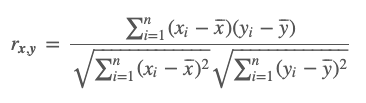

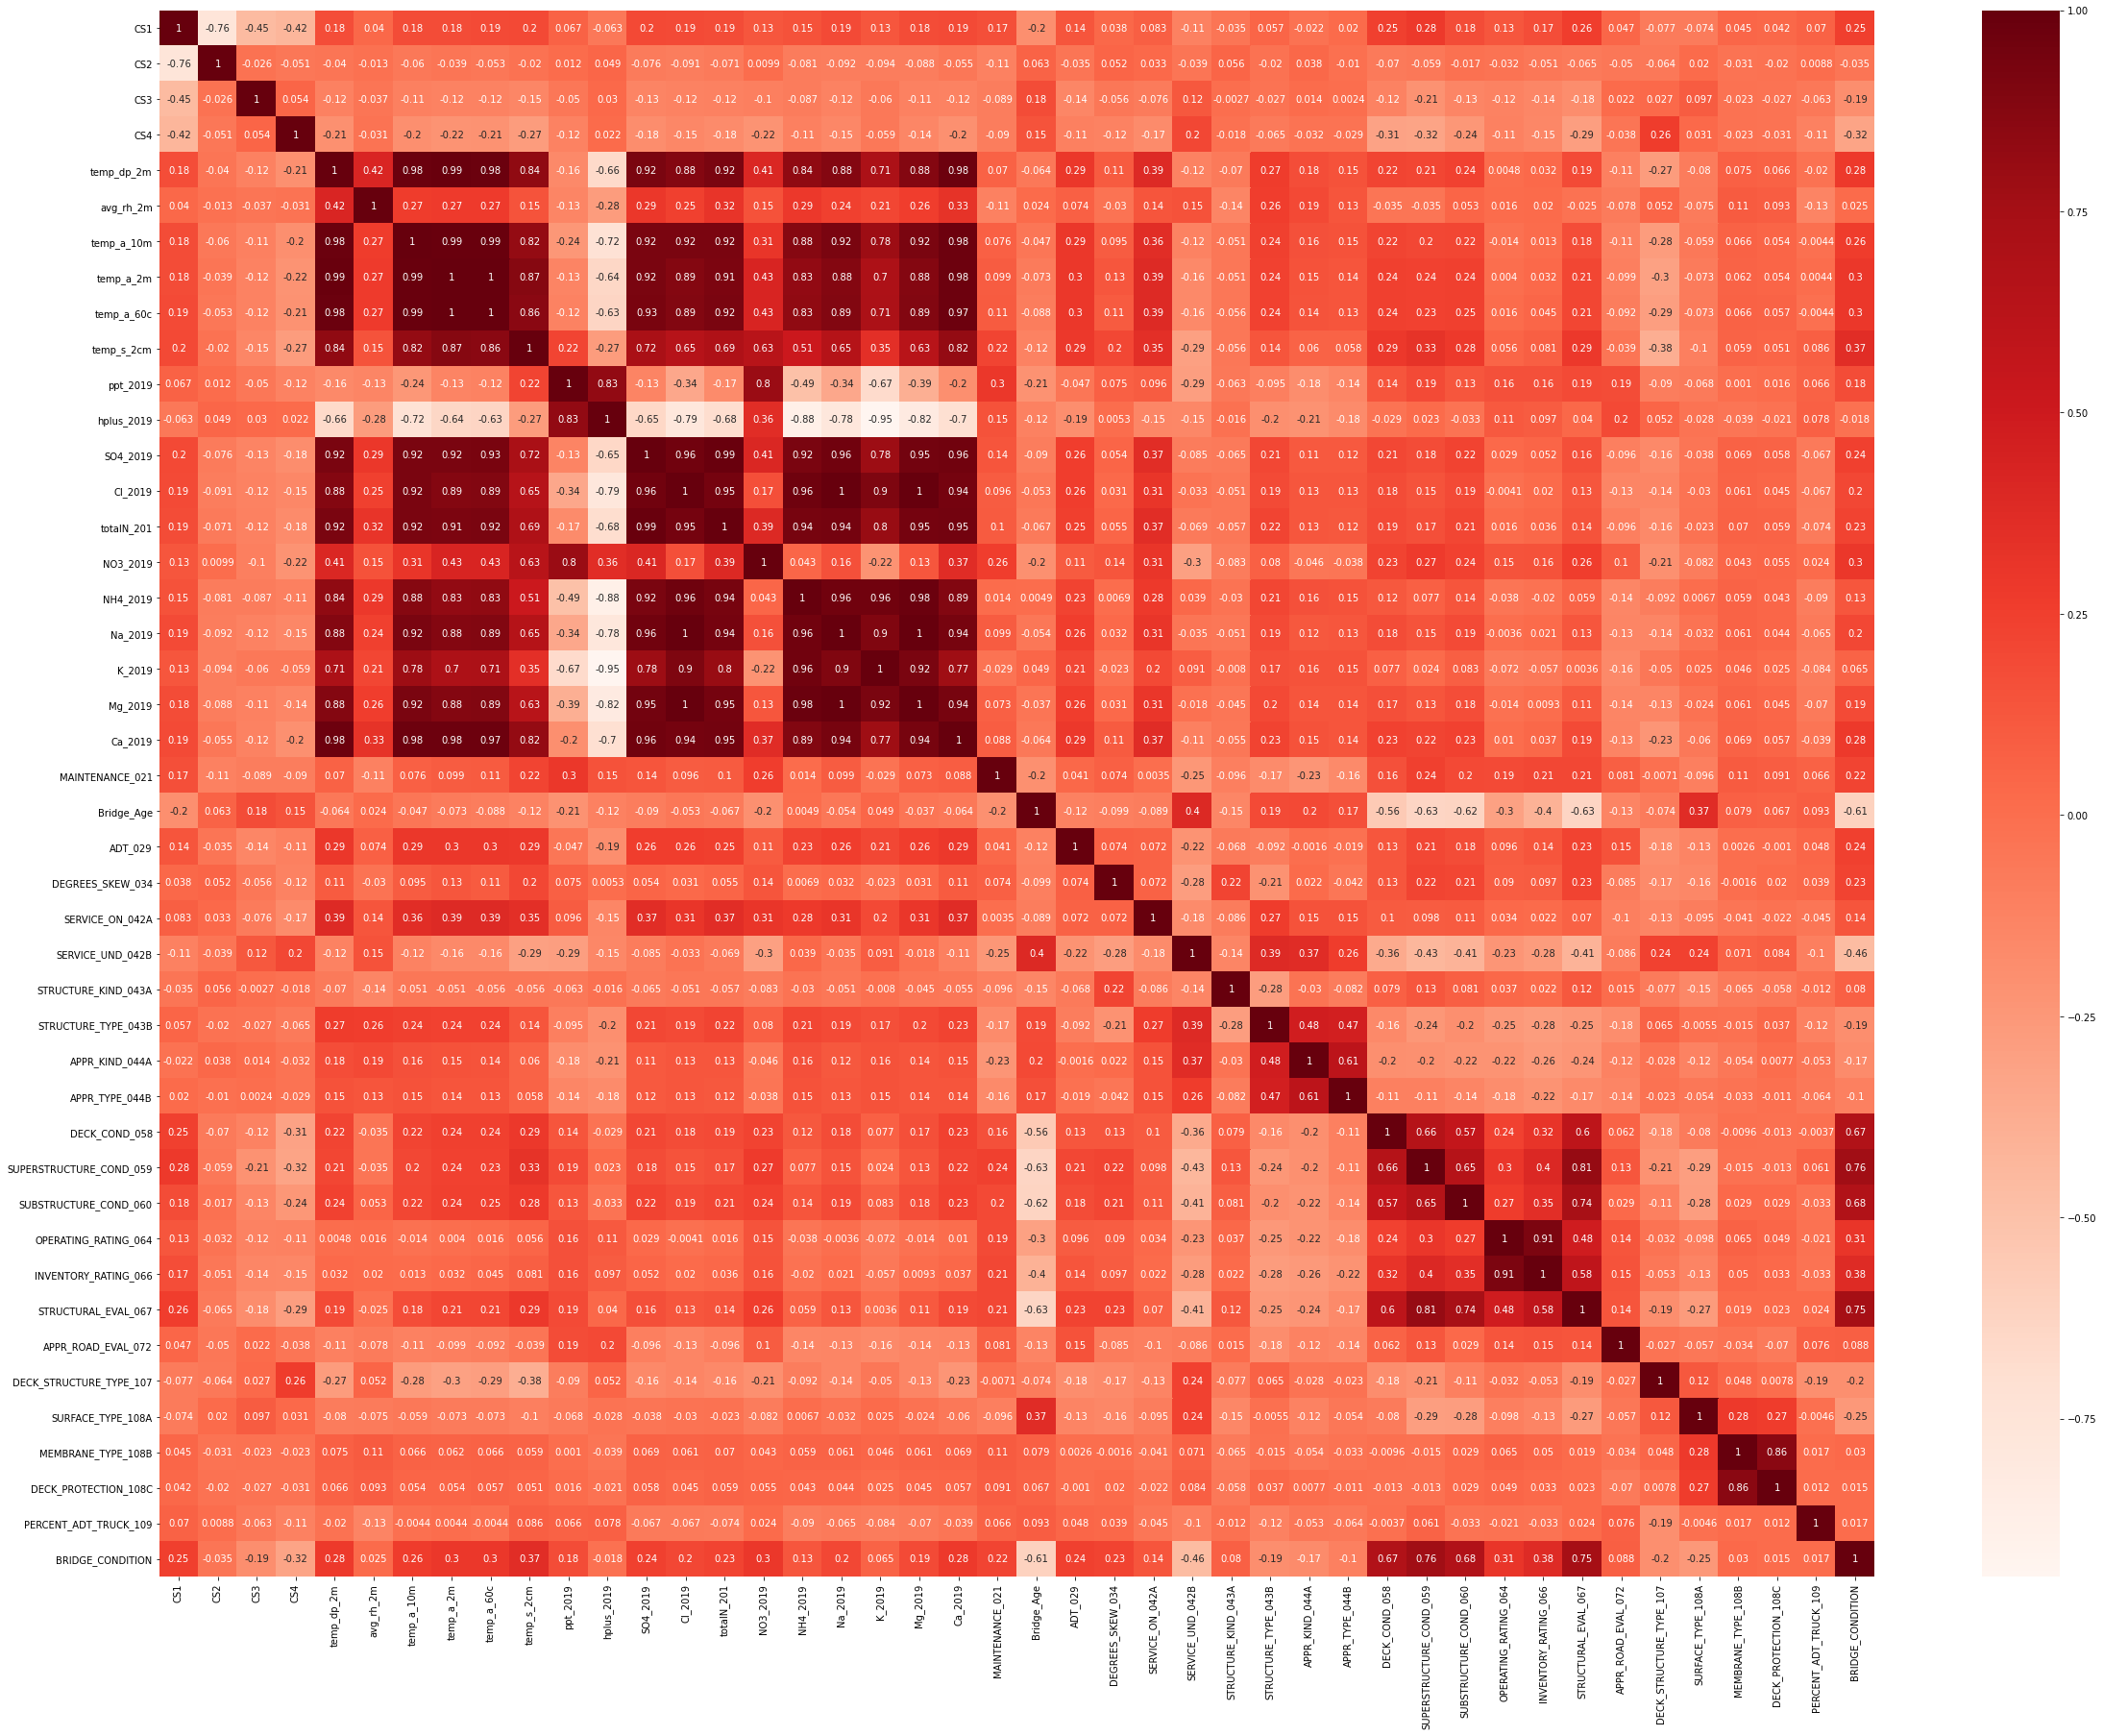

In [26]:
plt.figure(figsize=(40,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Select highly correlated features

In [27]:
cor_target = cor["CS1"]
cor_target

CS1                        1.000000
CS2                       -0.763297
CS3                       -0.454984
CS4                       -0.422842
temp_dp_2m                 0.175105
avg_rh_2m                  0.040275
temp_a_10m                 0.183145
temp_a_2m                  0.179591
temp_a_60c                 0.190859
temp_s_2cm                 0.200844
ppt_2019                   0.067202
hplus_2019                -0.062612
SO4_2019                   0.199846
Cl_2019                    0.192177
totalN_201                 0.185943
NO3_2019                   0.132781
NH4_2019                   0.151085
Na_2019                    0.193906
K_2019                     0.127829
Mg_2019                    0.183284
Ca_2019                    0.189248
MAINTENANCE_021            0.170090
Bridge_Age                -0.195688
ADT_029                    0.139073
DEGREES_SKEW_034           0.037541
SERVICE_ON_042A            0.083129
SERVICE_UND_042B          -0.113353
STRUCTURE_KIND_043A       -0

In [28]:
positive_relevant_features = cor_target[cor_target>0.2]
positive_relevant_features

CS1                        1.000000
temp_s_2cm                 0.200844
DECK_COND_058              0.247050
SUPERSTRUCTURE_COND_059    0.282340
STRUCTURAL_EVAL_067        0.259609
BRIDGE_CONDITION           0.252105
Name: CS1, dtype: float64

In [29]:
negative_relevant_features = cor_target[cor_target < 0]
negative_relevant_features

CS2                       -0.763297
CS3                       -0.454984
CS4                       -0.422842
hplus_2019                -0.062612
Bridge_Age                -0.195688
SERVICE_UND_042B          -0.113353
STRUCTURE_KIND_043A       -0.035392
APPR_KIND_044A            -0.022244
DECK_STRUCTURE_TYPE_107   -0.076557
SURFACE_TYPE_108A         -0.073734
Name: CS1, dtype: float64

In [30]:
cor_target4 = cor["CS4"]
cor_target4

CS1                       -0.422842
CS2                       -0.051309
CS3                        0.054481
CS4                        1.000000
temp_dp_2m                -0.206218
avg_rh_2m                 -0.030539
temp_a_10m                -0.196513
temp_a_2m                 -0.217596
temp_a_60c                -0.213104
temp_s_2cm                -0.270964
ppt_2019                  -0.123537
hplus_2019                 0.022338
SO4_2019                  -0.184109
Cl_2019                   -0.150142
totalN_201                -0.176277
NO3_2019                  -0.217051
NH4_2019                  -0.108259
Na_2019                   -0.151126
K_2019                    -0.059338
Mg_2019                   -0.143047
Ca_2019                   -0.202869
MAINTENANCE_021           -0.089809
Bridge_Age                 0.145857
ADT_029                   -0.105037
DEGREES_SKEW_034          -0.121942
SERVICE_ON_042A           -0.171039
SERVICE_UND_042B           0.201731
STRUCTURE_KIND_043A       -0

In [31]:
positive_relevant_features = cor_target[cor_target>0.2]
positive_relevant_features

CS1                        1.000000
temp_s_2cm                 0.200844
DECK_COND_058              0.247050
SUPERSTRUCTURE_COND_059    0.282340
STRUCTURAL_EVAL_067        0.259609
BRIDGE_CONDITION           0.252105
Name: CS1, dtype: float64

In [32]:
negative_relevant_features = cor_target[cor_target < 0]
negative_relevant_features

CS2                       -0.763297
CS3                       -0.454984
CS4                       -0.422842
hplus_2019                -0.062612
Bridge_Age                -0.195688
SERVICE_UND_042B          -0.113353
STRUCTURE_KIND_043A       -0.035392
APPR_KIND_044A            -0.022244
DECK_STRUCTURE_TYPE_107   -0.076557
SURFACE_TYPE_108A         -0.073734
Name: CS1, dtype: float64